In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

2025-10-07 16:12:10.726495: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-07 16:12:10.754061: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-07 16:12:11.554816: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
def f(x:float, y:float) -> float:
    return np.cos(x+y) + np.sin(x*y) - np.exp((x*x)/50) + 1.5

In [3]:
def binary_f(x:float, y:float) -> float:
    value = f(x, y)
    return np.where(value < 0.0, 0, 1)

In [68]:
rng = np.random.default_rng(12345)
x_random = (10 - (-10)) * rng.random((10_000,)) + (-10)
y_random = (10 - (-10)) * rng.random((10_000,)) + (-10)
z_random = binary_f(x_random, y_random)

In [69]:
training_X = np.stack((x_random, y_random), axis=-1)

In [70]:
training_Y = z_random

In [71]:
# traning_Y = np.reshape(z_random, (1, z_random.shape[0]))

In [72]:
model = Sequential([
    Dense(units=2, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=250, activation='relu'),
    Dense(units=250, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=1, activation='linear')
])

In [73]:
model.compile(
    loss=BinaryCrossentropy(from_logits=True)
)

# Getting some issues
# https://stackoverflow.com/questions/59499764/tensorflow-not-tensorflow-gpu-failed-call-to-cuinit-unknown-error-303

In [74]:
model.fit(training_X, training_Y, epochs=1_000)

Epoch 1/1000


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6118
Epoch 2/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5837
Epoch 3/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5753
Epoch 4/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5725
Epoch 5/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5691
Epoch 6/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5641
Epoch 7/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5608
Epoch 8/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5568
Epoch 9/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5527
Epoch 10/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5471
Epoch 11/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5440
Epoch 12/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5394
Epoch 13/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5359
Epoch 14/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5334
Epoch 15/1000
313/313 ━━━━━━━━━━━━━━━━━━━━

In [12]:
n = 0
f_x = tf.nn.sigmoid(model(training_X[n:n+1]))

In [13]:
f_x

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.3270682]], dtype=float32)>

In [75]:
x_space = np.linspace(-10, 10, 1000)
y_space = np.linspace(-10, 10, 1000)
xs, ys = np.meshgrid(x_space, y_space)

In [76]:
X_universe = np.stack(
    (
        np.reshape(xs, (xs.shape[0]*xs.shape[0],)), 
        np.reshape(ys, (ys.shape[0]*ys.shape[0]))
    ),
    axis=-1
)

In [77]:
X_universe

array([[-10.        , -10.        ],
       [ -9.97997998, -10.        ],
       [ -9.95995996, -10.        ],
       ...,
       [  9.95995996,  10.        ],
       [  9.97997998,  10.        ],
       [ 10.        ,  10.        ]], shape=(1000000, 2))

In [78]:
all_space_results = tf.nn.sigmoid(model(X_universe)).numpy()
all_space_results = np.reshape(all_space_results, (all_space_results.shape[0],))
all_space_results_binary = np.where(all_space_results>0.5, 1, 0)

In [79]:
all_space_results_binary = np.reshape(all_space_results_binary, (xs.shape[0], xs.shape[0]))

In [80]:
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

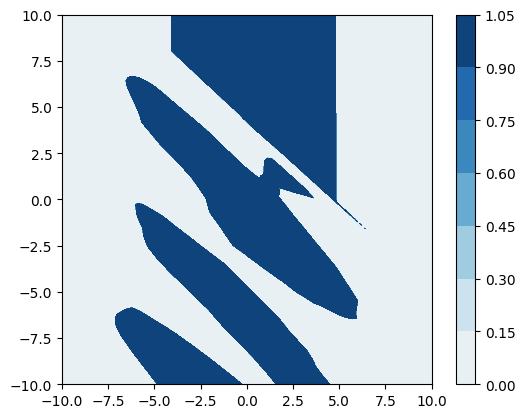

In [81]:
h = plt.contourf(
    x_space, y_space, all_space_results_binary,
    cmap="RdBu", norm=TwoSlopeNorm(0))
plt.axis('scaled')
plt.colorbar()
plt.show()